### Задание 1

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая (опции `sep=` и `decimal=` в функции `read_csv()` соответственно).

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).


In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("wgi_fh.csv", sep=";", decimal=",")

### Задание 2

Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. Есть ли в таблице пропущенные значения? Привести код и дать ответ в виде комментария.


In [4]:
data.info()
#В таблице 214 строк и 10 колонок. В таблице есть пропущенные значения.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   214 non-null    object 
 1   cnt_code  214 non-null    object 
 2   year      214 non-null    int64  
 3   va        204 non-null    float64
 4   ps        211 non-null    float64
 5   ge        209 non-null    float64
 6   rq        209 non-null    float64
 7   rl        209 non-null    float64
 8   cc        209 non-null    float64
 9   fh        197 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


### Задание 3

Если в датафрейме есть строки с пропущенными значениями, удалить их. Сохранить изменения в исходном датафрейме.

In [5]:
data.dropna(inplace=True)

### Задание 4

Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. Удалить данный столбец из датафрейма.

In [6]:
data.set_index(data["cnt_code"])
data.drop(columns=["cnt_code"], axis=1, inplace=True)

### Задание 5

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [7]:
data.sort_values(["cc", "va"], inplace=True)

### Задание 6

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой. 

In [8]:
f = lambda x: round(x, 1)
data["cc_round"] = data["cc"].apply(f)

### Задание 7

Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) страницы.

**Подсказка:** здесь понадобится функция, которая возвращает разные значения в зависимости от выполнения условий. Её можно написать через `def` или `lambda`. Больше про функции можно почитать на [pythontutor.ru](https://pythontutor.ru/lessons/functions/).

In [9]:
def c_status(x):
    if (1.0 <= x) & (x <= 2.5):
        return "Free"
    elif (3.0 <= x) & (x <= 5.0):
        return "Partle Free"
    elif (5.5 <= x) & (x <= 7.0):
        return "Not Free"
    
data["fh_status"] = data["fh"].apply(c_status)

### Задание 8

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [10]:
list = [data.groupby("fh_status")["ps"].mean(),
    data.groupby("fh_status")["ps"].min(),
    data.groupby("fh_status")["ps"].max()]

### Задание 9

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.

**Подсказка 1:** цикл `for`.

**Подсказка 2:**  [метод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) `.to_csv()` для выгрузки датафреймов `pandas` в csv-файлы.

In [11]:
a = data.groupby("fh_status")
for i, y in a:
    y.to_csv(f"{i}.csv")

### Задание 10

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

    Постройте, используя полученный датафрейм, столбиковую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. Чтобы увидеть график явно, прямо в текущем ноутбуке, допишите в начале ячейки с кодом для графика следующую строку:
    
        %matplotlib inline

**Подсказка:** число наблюдений — это функция `count`, её можно использовать наравне с `min`, `mean` и прочими.

In [13]:
df = data.groupby("fh_status")["country"].count()
df

fh_status
Free           85
Not Free       50
Partle Free    60
Name: country, dtype: int64

<Axes: xlabel='fh_status'>

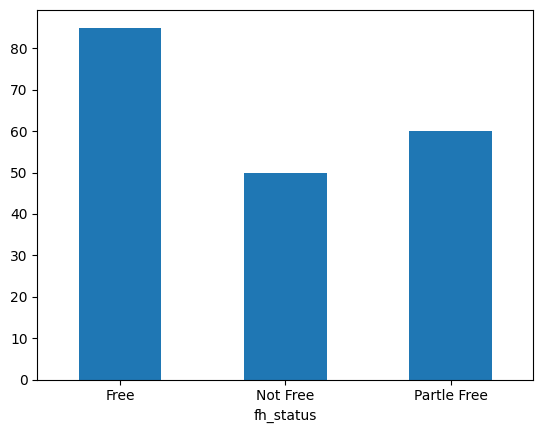

In [15]:
df.plot.bar(x="fh_status", y="country", rot=0)